In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


#A base de dados está em: https://www.kaggle.com/deepu1109/star-dataset
caminho_dataset = "stars.csv"
dados = pd.read_csv(caminho_dataset) 

X = dados.to_numpy()
y = X[:,-1:]
X = X[:,:-1]

label_encoder = LabelEncoder()

#transformando "Star color" em número inteiro
X[:,-1:] = label_encoder.fit_transform(X[:,-1:]).reshape(X[:,-1:].shape[0],1)
#transformando "Spectral class" em número inteiro
y = np.ravel(label_encoder.fit_transform(y))
print(y.shape)

(240,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [2]:
modelo = LogisticRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print("MSE:", mean_squared_error(y, ypred))
print("Intercept: ", modelo.intercept_)
#print("Coef: ", modelo.coef_)
#acurácia muito baixa. acho que essa base precisaria de um algoritmo mais robusto
from sklearn.metrics import accuracy_score
print(accuracy_score(y,ypred))

MSE: 7.004166666666666
Intercept:  [-4.04913940e-07 -1.10004404e-06 -3.03168234e-07 -1.95248836e-07
 -5.25368731e-08  3.60989527e-06 -1.55398335e-06]
0.4041666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


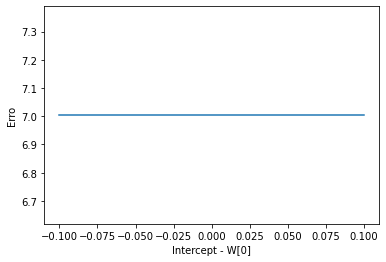

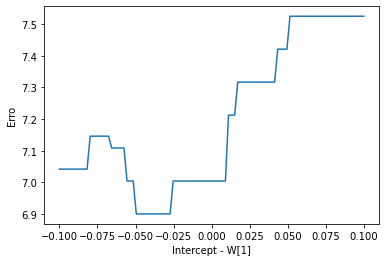

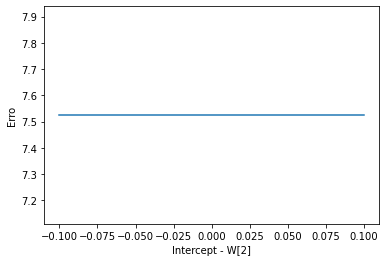

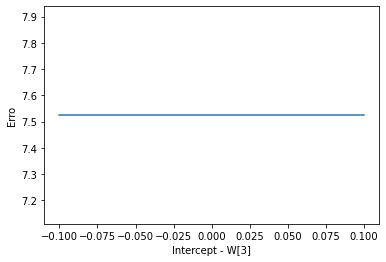

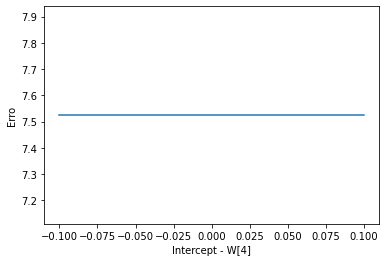

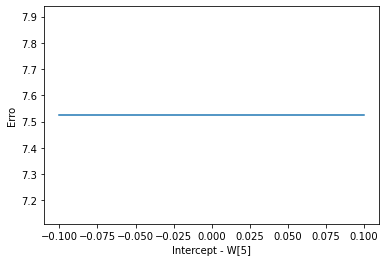

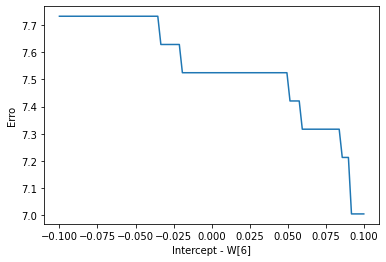

In [3]:
#print("Tamanho do Intercept: ", len(modelo.intercept_ ))
delta_w0 = [0.1, 1, 10]

def plot(i,delta):
    erros = []
    intercept = modelo.intercept_ [i]
    ws = np.linspace(intercept-delta, intercept+delta, 100)
    for w in ws:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    
    plt.ylabel("Erro")
    plt.xlabel(f"Intercept - W[{i}]")
    plt.plot(ws,erros)
    plt.show()

for i in range(len(modelo.intercept_ )):
    plot(i, delta_w0[0])    

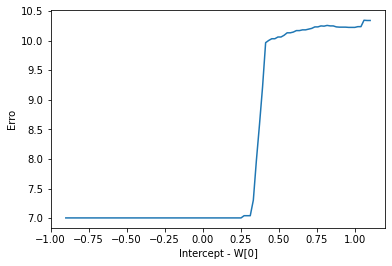

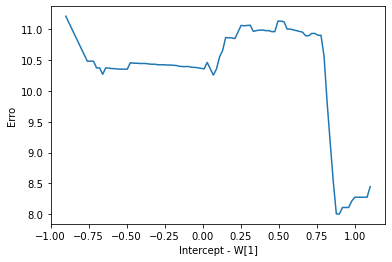

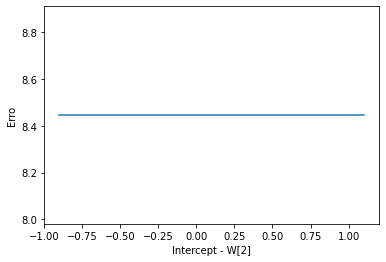

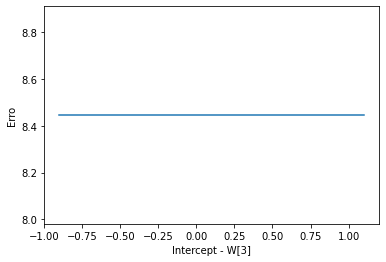

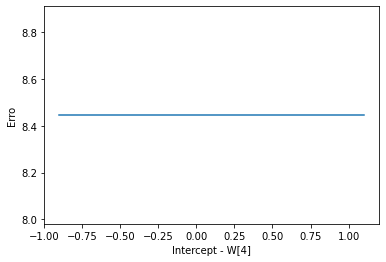

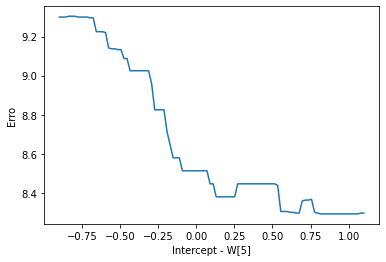

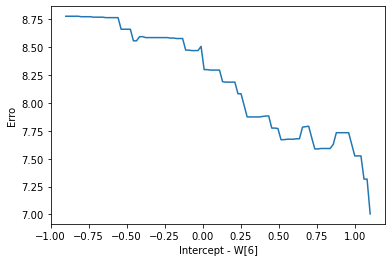

In [4]:
for i in range(len(modelo.intercept_ )):
    plot(i, delta_w0[1])

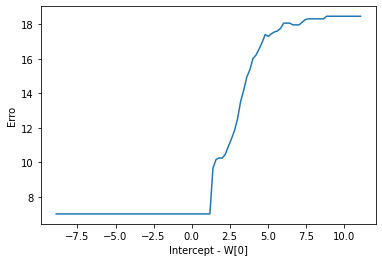

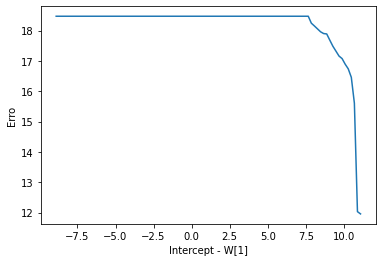

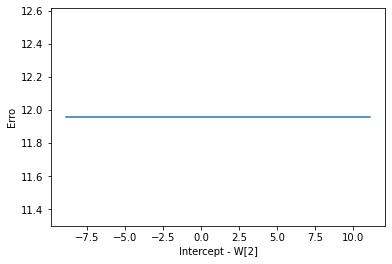

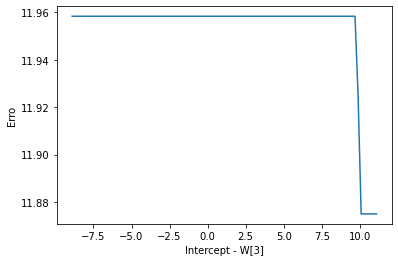

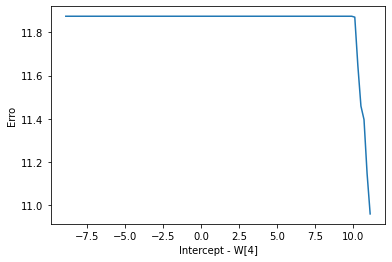

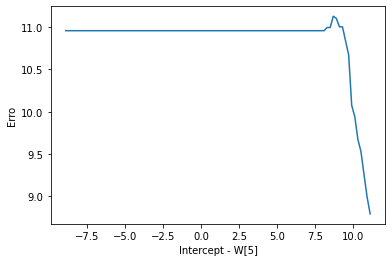

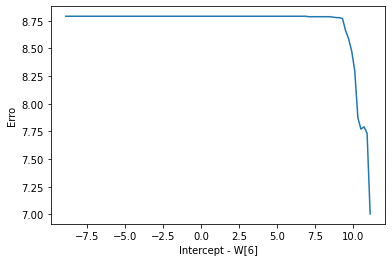

In [5]:
for i in range(len(modelo.intercept_ )):
    plot(i, delta_w0[2])

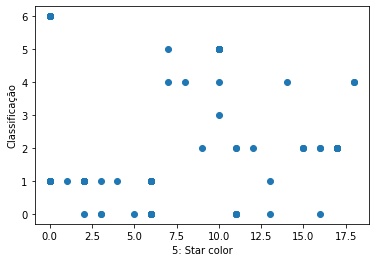

In [6]:
#pegando apenas o atributo Star Color
X5 = X[:,5:6]
plt.xlabel(f"5: {dados.columns[5]}")
plt.ylabel("Classificação")
plt.scatter(X5, y)
plt.show()
#da pra perceber que o atributo é diretamente ligado à classe